In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score,confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [337]:
df= pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [338]:
row, column= df.shape
print('there are ',row,'and ',column,'columns inside the dataset')

there are  11162 and  17 columns inside the dataset


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There are no missing values inside the dataset

In [340]:
df['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [341]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [342]:
#checking for numerical values
df_numeric=df.select_dtypes(include= ['int16','int32','int64'])
df_numeric.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


plot these numerical attributes to see the distribution

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

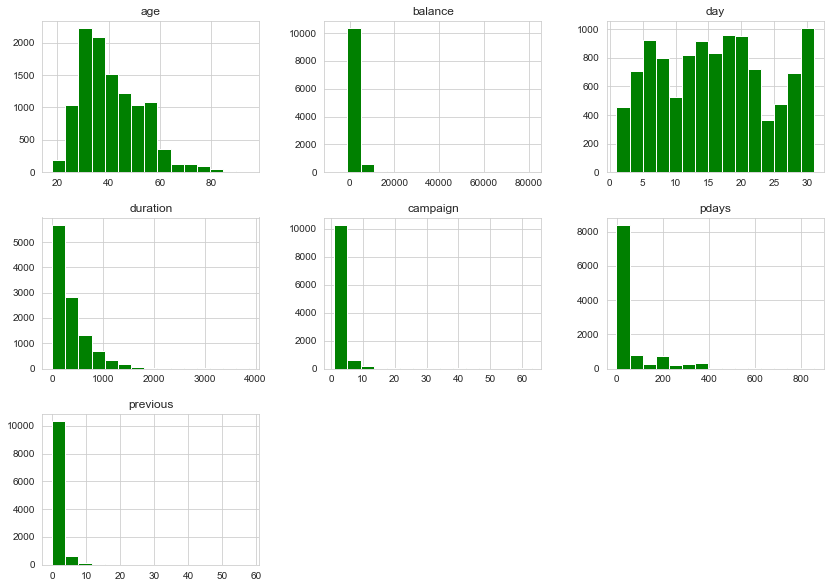

In [343]:
df.hist(figsize=(14,10),bins=15,color='g')

# EDA

<AxesSubplot:xlabel='deposit', ylabel='age'>

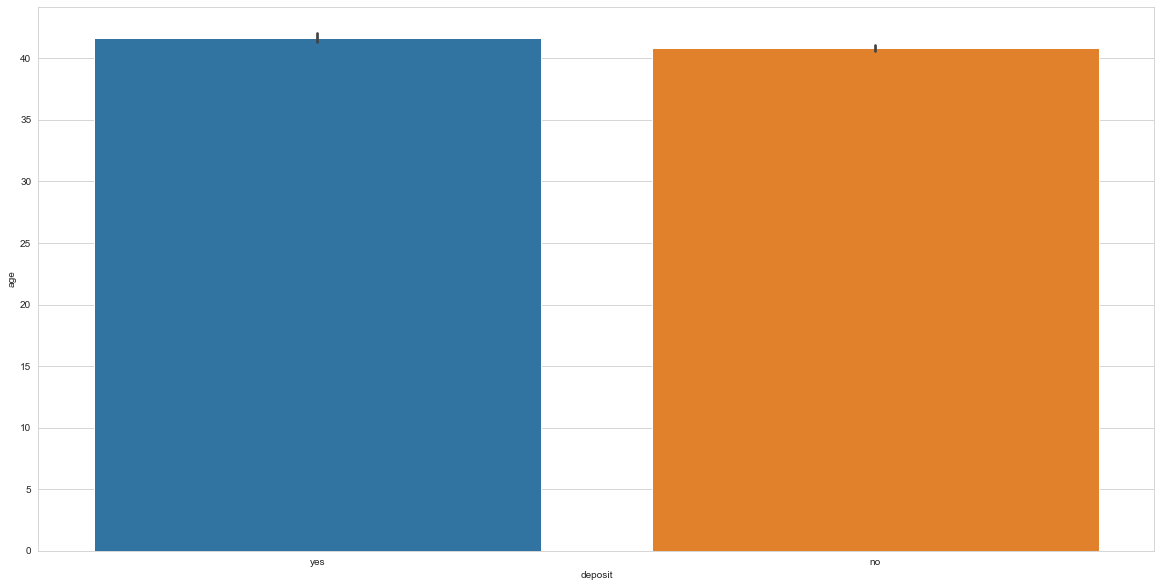

In [344]:
#exploring age vs deposit
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.barplot(x= df['deposit'],y= df['age'])

 there are more client between the ages of 0 and 40 who subscribed to the term deposit than those who did not.

<AxesSubplot:xlabel='deposit', ylabel='balance'>

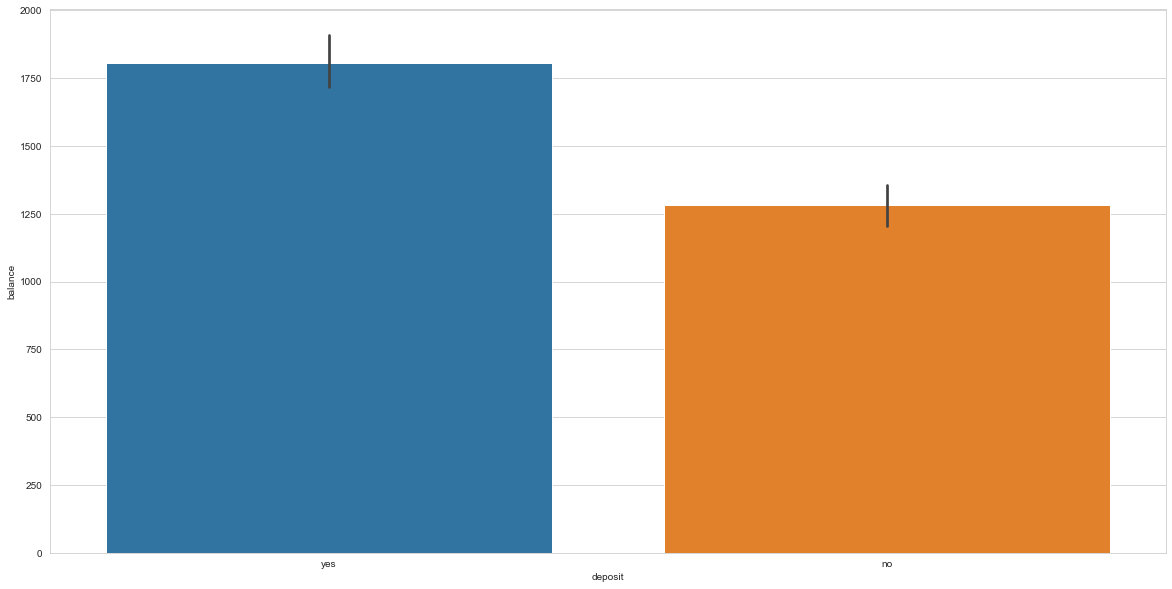

In [345]:
#balance and deposit
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.barplot(x= df['deposit'],y= df['balance'])

there are more clients with a balance between 0 and 1750 who subscribed to the term deposit than those who did not.

<AxesSubplot:xlabel='deposit', ylabel='campaign'>

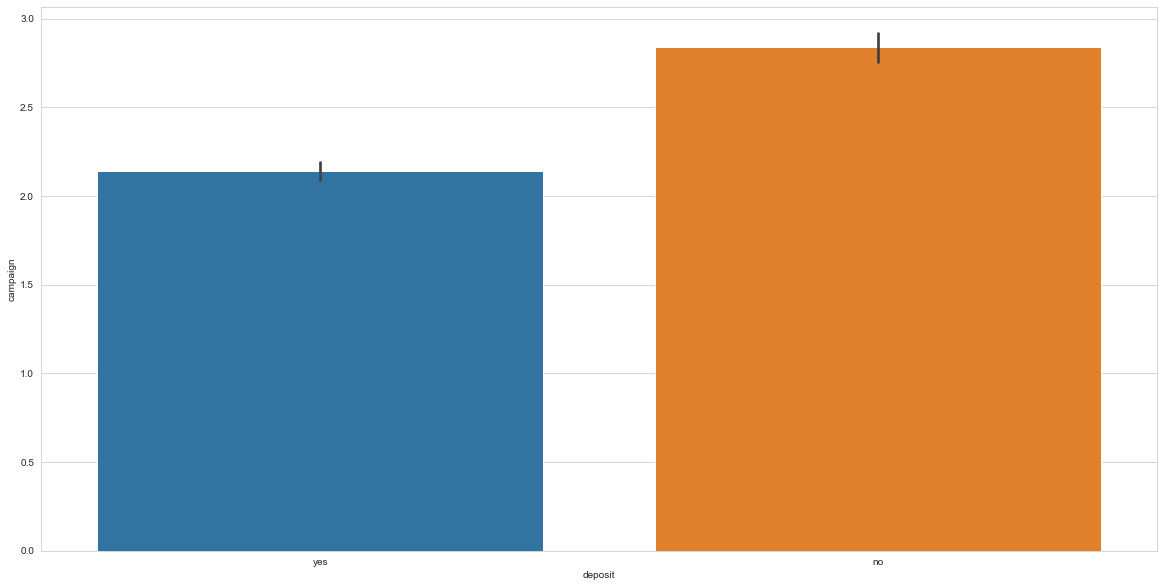

In [346]:
#campaign and deposit
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.barplot(x= df['deposit'],y= df['campaign'])

 the are more clients who subscribed to the term deposit but had been contacted more than 2.0 times.

In [347]:
#categorical variables
df_cat= df.select_dtypes(include='object')
df_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


<AxesSubplot:xlabel='job', ylabel='count'>

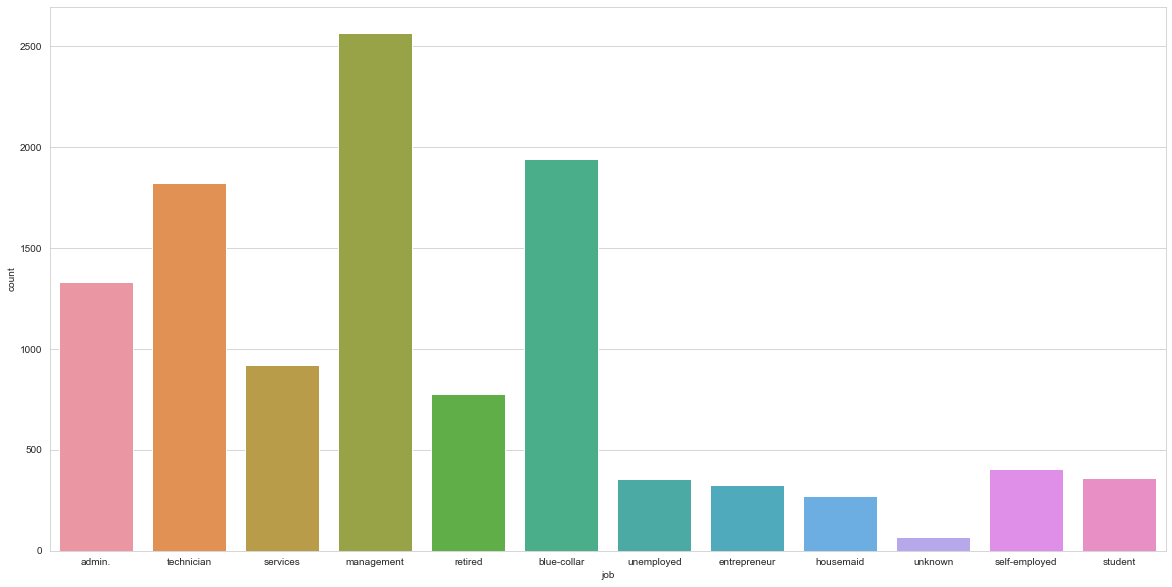

In [348]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(df['job'])

 from the visuals below, we can conclude that people with management jobs took part the most in the campaign.

<AxesSubplot:xlabel='marital', ylabel='count'>

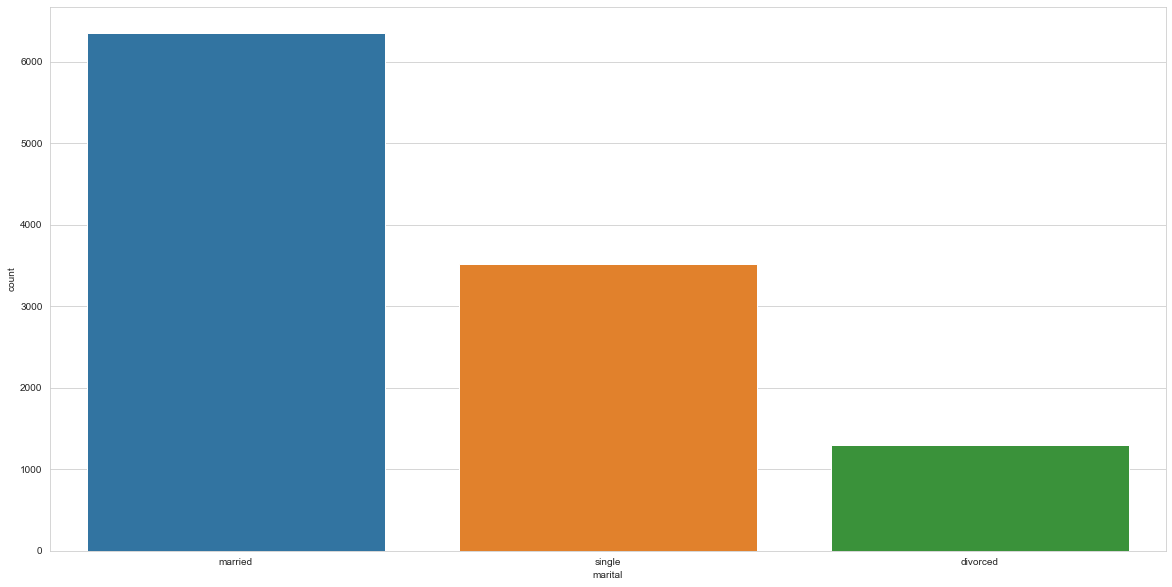

In [349]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(df['marital'])

there are more married people who took part in the campaign than single people or those with unknown marital statuses.

<AxesSubplot:xlabel='education', ylabel='count'>

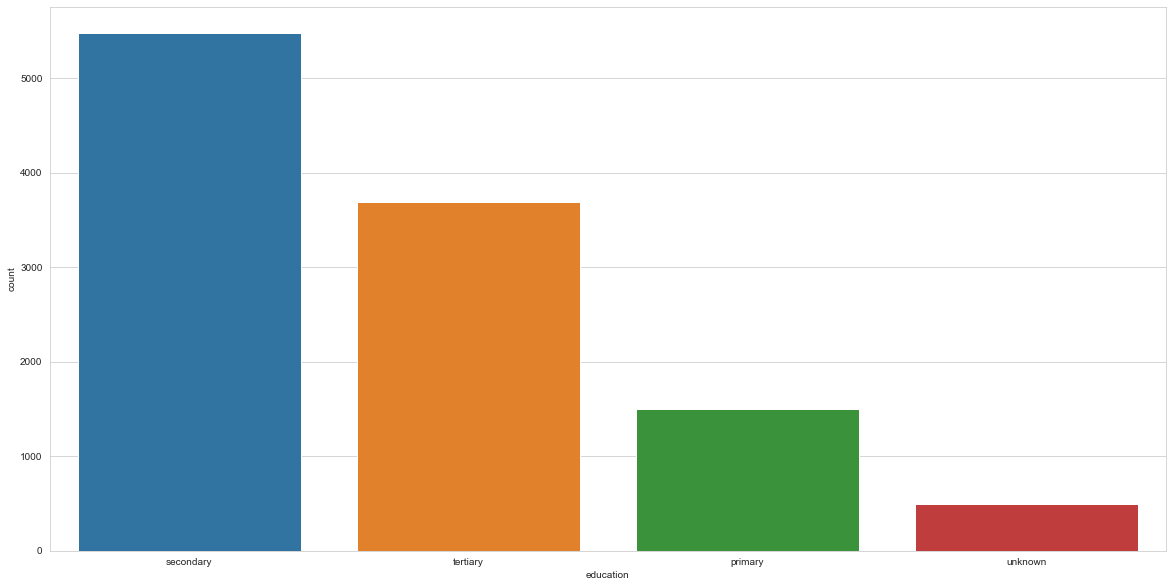

In [350]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(df['education'])

 there are more clients who had a secondary education who had taken part in the campaign.



<AxesSubplot:xlabel='housing', ylabel='count'>

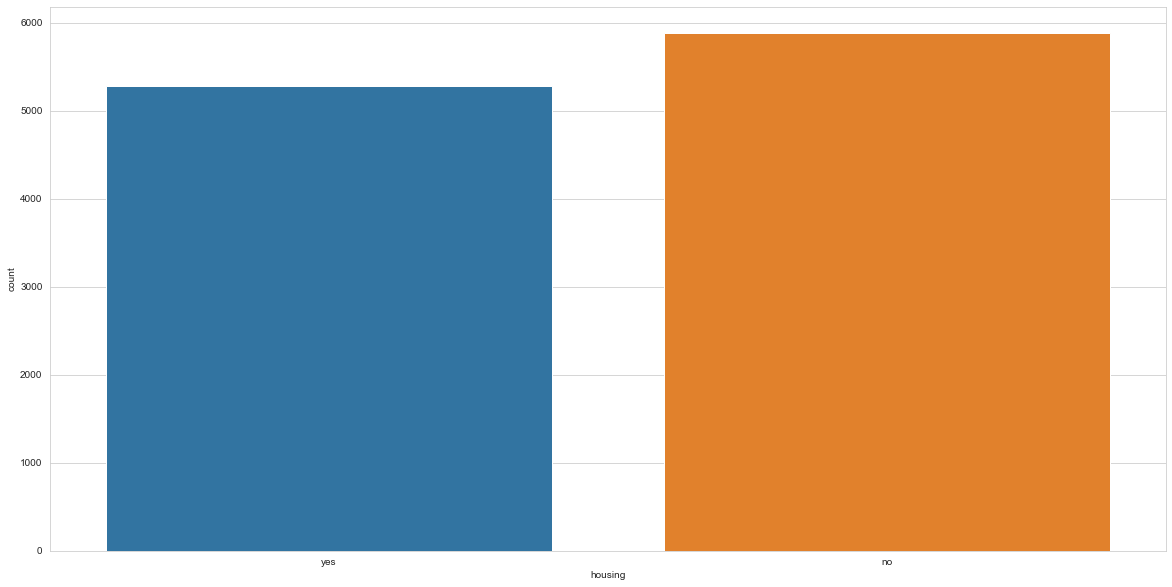

In [351]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(df['housing'])

most clients did not have a housing loan.

<AxesSubplot:xlabel='loan', ylabel='count'>

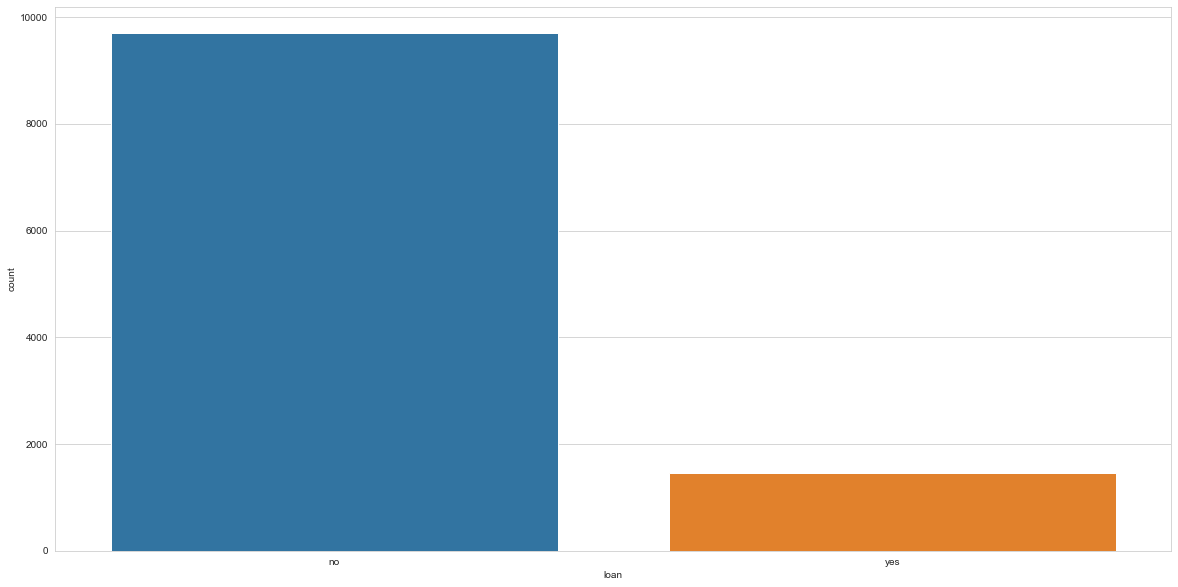

In [352]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.countplot(df['loan'])

most clients had not taken a personal loan.

<AxesSubplot:>

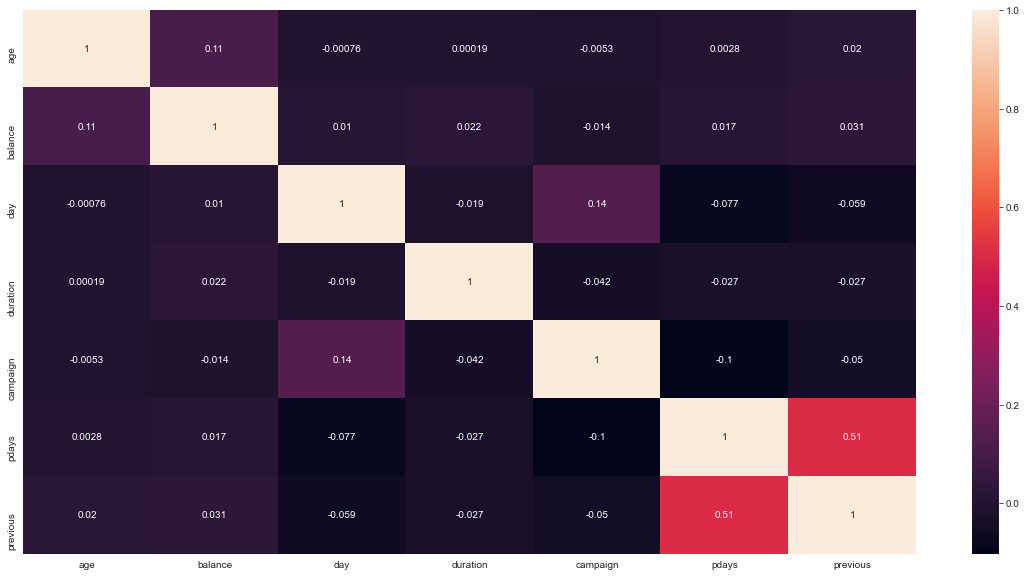

In [353]:
#checking for correlation
plt.figure(figsize=(20,10))
cor= df.corr()
sns.heatmap(cor,annot= True)

there are no values with high correlation in this dataset

<Figure size 1440x2880 with 0 Axes>

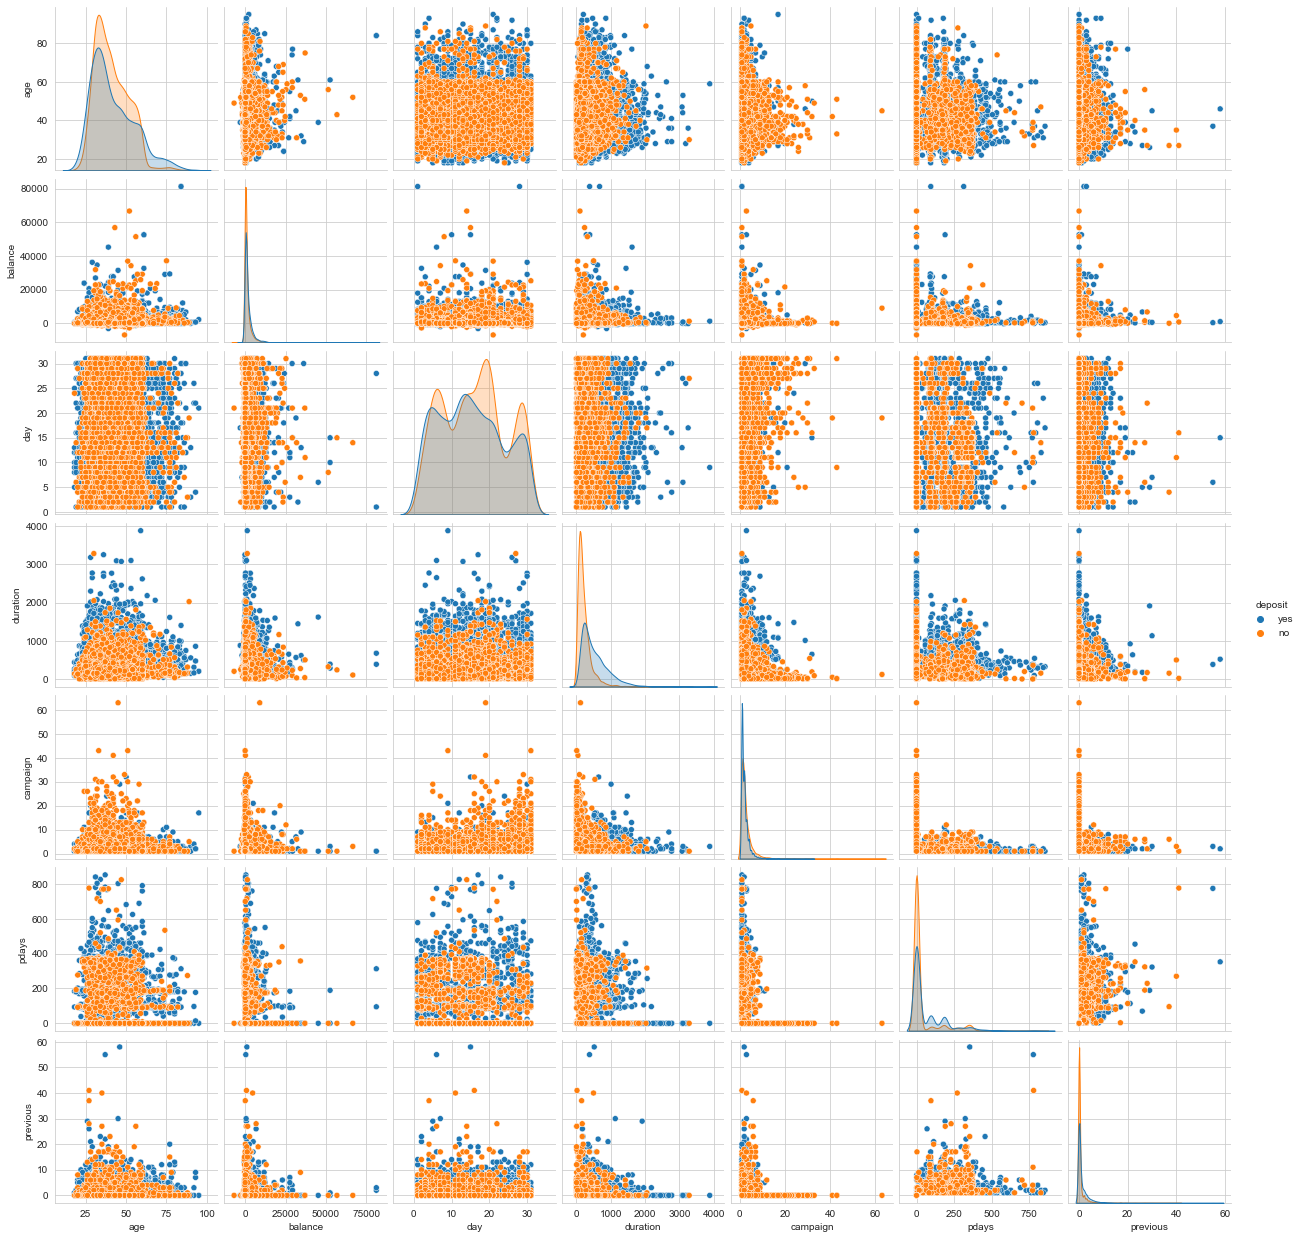

In [354]:
#bivariate analysis
plt.figure(figsize=[20,40])

sns.pairplot(df,hue='deposit')

# HANDLING OUTLIERS

Text(0.5, 1.0, 'Box plot for Age')

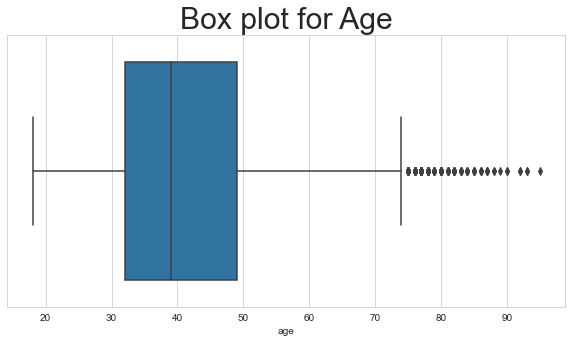

In [355]:
plt.rcParams['figure.figsize'] = (10,5)
sns.boxplot('age',data= df)
plt.title('Box plot for Age',fontsize= 30)

We could find that the Even if there are outliners in age column, the maximum age 95 and min age 18 can be an expected age according to the domain knowledge. Customers of 18 yrs to 95 yrs can have a term deposit. Hence we are not removing the outliners of Age.

Text(0.5, 1.0, 'Box plot for Balance')

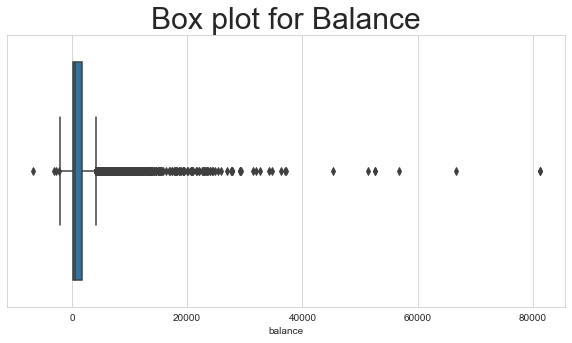

In [356]:
sns.boxplot('balance',data= df)
plt.title('Box plot for Balance',fontsize= 30)

we can ignore the outliners of Balance as it can vary according to the coustmers according to the domain knowledge.

Text(0.5, 1.0, 'Box plot for day')

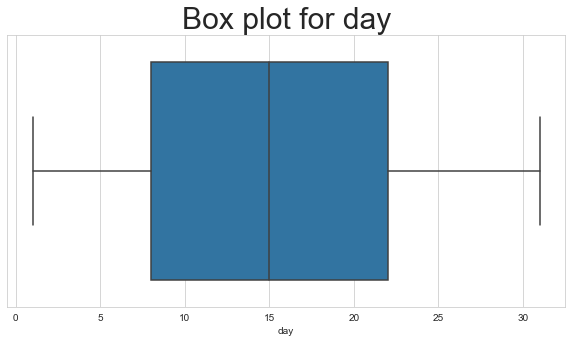

In [357]:
sns.boxplot('day',data= df)
plt.title('Box plot for day',fontsize= 30)

Text(0.5, 1.0, 'Box plot for Duration')

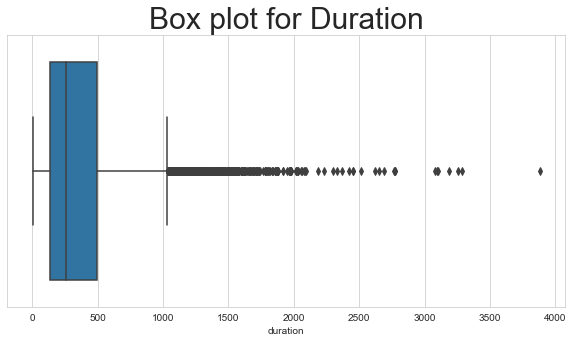

In [358]:
sns.boxplot('duration',data= df)
plt.title('Box plot for Duration',fontsize= 30)

this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [359]:
df.drop(['duration'],axis=1,inplace= True)

Text(0.5, 1.0, 'Box plot for campaign')

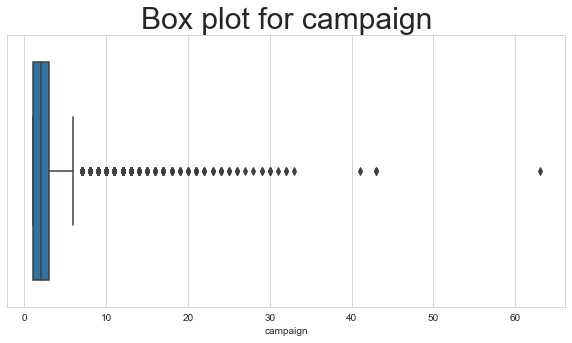

In [360]:
sns.boxplot('campaign',data= df)
plt.title('Box plot for campaign',fontsize= 30)

campaign which represent the number of contacts performed during this campaign and for this client. In above boxplot we can see that only 1 value have more than 50. So i have removed that record.

In [361]:
df=df[df['campaign']<50]
df=df.reset_index(drop=True)

Text(0.5, 1.0, 'Box plot for pdays')

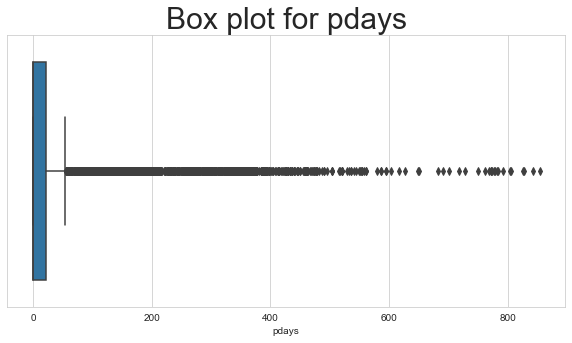

In [362]:
sns.boxplot('pdays',data= df)
plt.title('Box plot for pdays',fontsize= 30)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [363]:
len(df[df['pdays']==999])

0

there is no issue with this column. 999 days means client was not previously contacted

Text(0.5, 1.0, 'Box plot for previous')

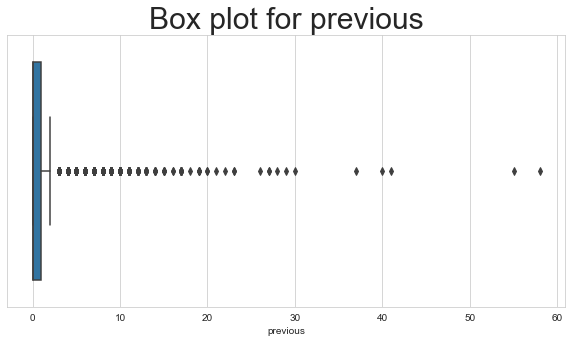

In [364]:
sns.boxplot('previous',data= df)
plt.title('Box plot for previous',fontsize= 30)

previous: number of contacts performed before this campaign and for this client
we have calculated the quantile and only dropped outliners with huge difference in previous 

In [365]:
maxi=df['previous'].quantile(0.995)
maxi

13.0

In [366]:
d=df[df['previous']>maxi]
ind=d.index

In [367]:
df.drop(ind, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


# HANDLING MISSING VALUES

In [368]:
#unknown values are replacing with nan
df.replace('unknown',np.nan, inplace= True)

In [369]:
df.isna().sum()

age             0
job            70
marital         0
education     496
default         0
balance         0
housing         0
loan            0
contact      2344
day             0
month           0
campaign        0
pdays           0
previous        0
poutcome     8325
deposit         0
dtype: int64

Here we can fill missing value at job column with mode

In [370]:
df['job'].value_counts()

management       2555
blue-collar      1935
technician       1813
admin.           1328
services          921
retired           776
self-employed     402
student           358
unemployed        356
entrepreneur      327
housemaid         274
Name: job, dtype: int64

In [371]:
df['job']= df['job'].fillna(df['job'].mode()[0])

In [372]:
df['job'].isna().sum()

0

In [373]:
df['job'].value_counts()

management       2625
blue-collar      1935
technician       1813
admin.           1328
services          921
retired           776
self-employed     402
student           358
unemployed        356
entrepreneur      327
housemaid         274
Name: job, dtype: int64

In [374]:
#total percentage of missing values in education field 
df['education'].isna().sum()*100/len(df['education'])

4.462438146648673

replace the value with mode

In [375]:
df['education']= df['education'].fillna(df['education'].mode()[0])

In [376]:
df['education'].isna().sum()

0

In [377]:
df['education'].value_counts()

secondary    5951
tertiary     3673
primary      1491
Name: education, dtype: int64

In [378]:
df['contact'].isna().sum()*100/len(df['contact'])

21.088618983355826

Here in contact column we can replace null values with mode

In [379]:
df['contact'].unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [380]:
df['contact']= df['contact'].fillna(df['contact'].mode()[0])

In [381]:
df['poutcome'].unique()

array([nan, 'other', 'failure', 'success'], dtype=object)

In [382]:
df['poutcome'].value_counts()

failure    1212
success    1064
other       514
Name: poutcome, dtype: int64

In [383]:
df['poutcome'].isna().sum()*100/len(df['poutcome'])

74.89878542510121

Here majority values in poutcome are missing. So we can drop that column

In [384]:
df.drop(['poutcome'],axis= 1, inplace=True)

In [385]:
#Now check for any missing values inside the dataset
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

# SCALING

In [386]:
scaler= StandardScaler()

In [387]:
new_num=['age','balance','campaign','pdays','previous']
df[new_num]= scaler.fit_transform(df[new_num])

In [388]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,deposit
0,1.490446,admin.,married,secondary,no,0.252655,yes,no,cellular,5,may,-0.563410,-0.477929,-0.427031,yes
1,1.238673,admin.,married,secondary,no,-0.459098,no,no,cellular,5,may,-0.563410,-0.477929,-0.427031,yes
2,-0.020190,technician,married,secondary,no,-0.079682,yes,no,cellular,5,may,-0.563410,-0.477929,-0.427031,yes
3,1.154749,services,married,secondary,no,0.293849,yes,no,cellular,5,may,-0.563410,-0.477929,-0.427031,yes
4,1.070825,admin.,married,tertiary,no,-0.416046,no,no,cellular,5,may,-0.188017,-0.477929,-0.427031,yes


Now we have scaled down the numeric values

# ENCODING

In [389]:
#after few preprocessing we have reduced columns from 17 to 15. 
df.shape

(11115, 15)

In [390]:
df_cat_after_= df.select_dtypes(include='object')

In [391]:
n= df_cat_after_.shape[1]
print('there are {} categorical columns to encode'.format(n))

there are 9 categorical columns to encode


In [392]:
df_cat_after_.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'deposit'],
      dtype='object')

In [393]:
label_en= LabelEncoder()

In [394]:
df['job']= label_en.fit_transform(df['job'])
df['marital']= label_en.fit_transform(df['marital'])
df['education']= label_en.fit_transform(df['education'])
df['default']= label_en.fit_transform(df['default'])
df['housing']= label_en.fit_transform(df['housing'])
df['loan']= label_en.fit_transform(df['loan'])
df['contact']= label_en.fit_transform(df['contact'])
df['month']= label_en.fit_transform(df['month'])
df['deposit']=label_en.fit_transform(df['deposit'])

In [395]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,deposit
0,1.490446,0,1,1,0,0.252655,1,0,0,5,8,-0.563410,-0.477929,-0.427031,1
1,1.238673,0,1,1,0,-0.459098,0,0,0,5,8,-0.563410,-0.477929,-0.427031,1
2,-0.020190,9,1,1,0,-0.079682,1,0,0,5,8,-0.563410,-0.477929,-0.427031,1
3,1.154749,7,1,1,0,0.293849,1,0,0,5,8,-0.563410,-0.477929,-0.427031,1
4,1.070825,0,1,2,0,-0.416046,0,0,0,5,8,-0.188017,-0.477929,-0.427031,1


# SPLITING THE DATASET

In [398]:
y= df['deposit']

In [400]:
X= df.drop('deposit',axis=1)

In [402]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 20)

In [403]:
# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8892, 14)
Shape of testing feature: (2223, 14)
Shape of training label: (8892,)
Shape of training label: (2223,)


# MODELING

In [413]:
def evaluate_model(model,X_test,y_test):
    y_pred= model.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    pre= precision_score(y_test,y_pred)
    f1= f1_score(y_test,y_pred)
    conf_mat= confusion_matrix(y_test,y_pred)
    return {'acc': acc,'pre':pre, 'f1':f1, 'conf_mat':conf_mat}
    

# Decision Tree

In [410]:
dec_tree= DecisionTreeClassifier()

In [411]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [414]:
#evaluating model
dec_tree_eval= evaluate_model(dec_tree,X_test,y_test)

In [417]:
print('accuracy score:', dec_tree_eval['acc'])
print('precision score:',dec_tree_eval['pre'])
print('f1 score:',dec_tree_eval['f1'])
print('confusin matrix:',dec_tree_eval['conf_mat'])

accuracy score: 0.601889338731444
precision score: 0.5976447497546614
f1 score: 0.579172610556348
confusin matrix: [[729 410]
 [475 609]]


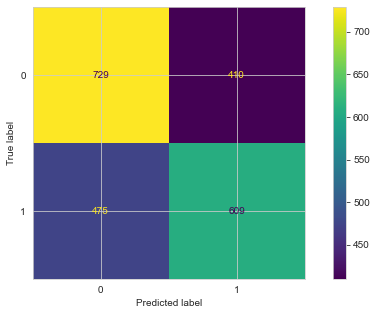

In [430]:
plot_confusion_matrix(dec_tree,X_test,y_test)

# Random Forest

In [419]:
ran_for= RandomForestClassifier()

In [420]:
ran_for.fit(X_train,y_train)

RandomForestClassifier()

In [421]:
ran_for_eval= evaluate_model(ran_for,X_test,y_test)

In [422]:
print('accuracy score:', ran_for_eval['acc'])
print('precision score:',ran_for_eval['pre'])
print('f1 score:',ran_for_eval['f1'])
print('confusin matrix:',ran_for_eval['conf_mat'])

accuracy score: 0.7058029689608637
precision score: 0.7432126696832579
f1 score: 0.6676829268292683
confusin matrix: [[912 227]
 [427 657]]


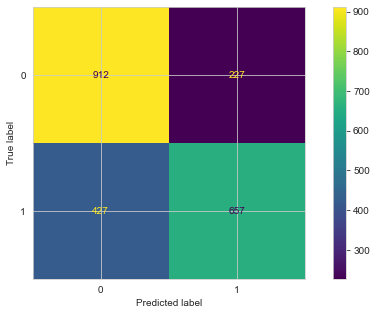

In [431]:
plot_confusion_matrix(ran_for,X_test,y_test)

# KNN

In [424]:
knn= KNeighborsClassifier()

In [425]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [426]:
knn_eval= evaluate_model(knn,X_test,y_test)

In [427]:
print('accuracy score:', knn_eval['acc'])
print('precision score:',knn_eval['pre'])
print('f1 score:',knn_eval['f1'])
print('confusin matrix:',knn_eval['conf_mat'])

accuracy score: 0.6518218623481782
precision score: 0.6749435665914221
f1 score: 0.6071065989847716
confusin matrix: [[851 288]
 [486 598]]


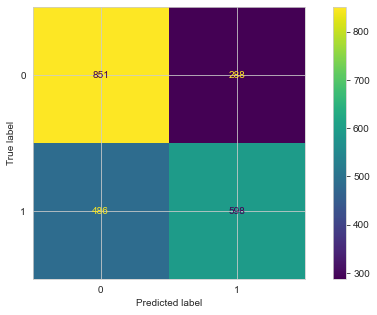

In [432]:
plot_confusion_matrix(knn,X_test,y_test)

# SVM

In [433]:
#linear kernal
svc= SVC(kernel='linear')

In [434]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [435]:
svc_eval= evaluate_model(svc,X_test,y_test)

In [436]:
print('accuracy score:', svc_eval['acc'])
print('precision score:',svc_eval['pre'])
print('f1 score:',svc_eval['f1'])
print('confusin matrix:',svc_eval['conf_mat'])

accuracy score: 0.6468735942420153
precision score: 0.6433365292425696
f1 score: 0.6309355900329102
confusin matrix: [[767 372]
 [413 671]]


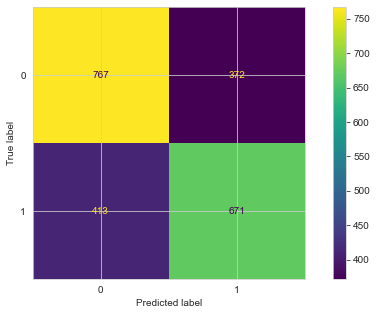

In [437]:
plot_confusion_matrix(svc,X_test,y_test)

In [438]:
#Gaussian Kernel
svc_g_ = SVC(kernel='rbf')

In [439]:
svc_g_.fit(X_train,y_train)

SVC()

In [440]:
svc_g_eval= evaluate_model(svc_g_,X_test,y_test)

In [441]:
print('accuracy score:', svc_g_eval['acc'])
print('precision score:',svc_g_eval['pre'])
print('f1 score:',svc_g_eval['f1'])
print('confusin matrix:',svc_g_eval['conf_mat'])

accuracy score: 0.650472334682861
precision score: 0.6838323353293413
f1 score: 0.5951016154247003
confusin matrix: [[875 264]
 [513 571]]


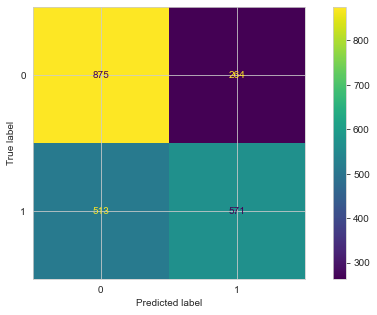

In [442]:
plot_confusion_matrix(svc_g_,X_test,y_test)

In [443]:
#sigmoid kernel
svc_sig= SVC(kernel='sigmoid')

In [444]:
svc_sig.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [445]:
svc_sig_eval= evaluate_model(svc_sig,X_test,y_test)

In [447]:
print('accuracy score:', svc_sig_eval['acc'])
print('precision score:',svc_sig_eval['pre'])
print('f1 score:',svc_sig_eval['f1'])
print('confusin matrix:',svc_sig_eval['conf_mat'])

accuracy score: 0.5011246063877642
precision score: 0.4880838894184938
f1 score: 0.4800750117205813
confusin matrix: [[602 537]
 [572 512]]


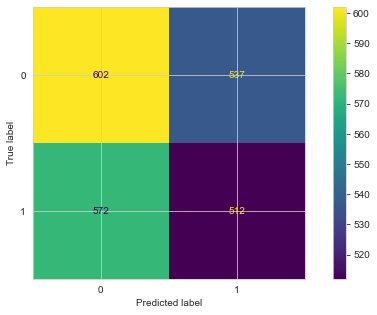

In [448]:
plot_confusion_matrix(svc_sig,X_test,y_test)

conclusion:Here we can see upon performing different classification model in  our dataset Random forest algorithm performs well than the other model. So we choose Random forest for this dataset to predict the result